# Malignant Comments Classifier Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_train=pd.read_csv('malignant_comments_classifier_train.csv')

In [3]:
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df_train.shape

(159571, 8)

There are 159571 rows and 8 columns.

In [5]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

We don't see any importance of the id column however the comment column helps us label through the remaining columns in binary labels.

In [6]:
df_test=pd.read_csv('malignant_comments_classifier_test.csv')

In [7]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [8]:
df_test.shape

(153164, 2)

There are 153164 rows and 2 columns.

In [9]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

After checking through the tarining data when we take a loot at the testing dataset we see that there are 1,53,164 rows and only 2 columns present in this dataframe. This gives us the idea that we will need to create additional columns to mark the comments into various categories as per our model confidence. Once again the id column does not seem to offer any significance and can be removed.

In [10]:
df_test.info

<bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

# DataFrame Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

1)Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
2)Highly Malignant: It denotes comments that are highly malignant and hurtful.
3)Rude: It denotes comments that are very rude and offensive.
4)Threat: It contains indication of the comments that are giving any threat to someone.
5)Abuse: It is for comments that are abusive in nature.
6)Loathe: It describes the comments which are hateful and loathing in nature.
7)ID: It includes unique Ids associated with each comment text given.
8)Comment text: This column contains the comments extracted from various social media platforms.
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.

# EDA-Exploratory Data Analysis

In [11]:
print("We have {} Rows and {} Columns in our dataframe".format(df_train.shape[0], df_train.shape[1]))
df_train.head(20)

We have 159571 Rows and 8 Columns in our dataframe


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Column description

id:A unique id aligned with each comment text.

comment_text : It includes the comment text.

malignant : It is a column with binary values depicting which comments are malignant in nature.

highly_malignant : Binary column with labels for highly malignant text.

rude : Binary column with labels for comments that are rude in nature.

threat : Binary column with labels for threatening context in the comments.

abuse : Binary column with labels with abusive behaviour.

loathe : Label to comments that are full of loathe and hatred.

# Missing values

In [12]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There are no missing values present in our train data set.

# Graphical representation of missing values

<AxesSubplot:>

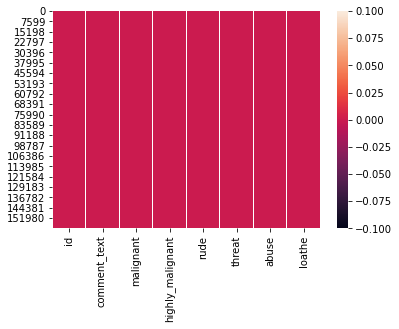

In [13]:
sns.heatmap(df_train.isnull())

The above haetmap also shows the absence of missing values in our train dataset.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have a total of 8 columns out of which 2 columns have object datatype while the remaining 6 columns are of integer datatype.

In [15]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


Above ratio shows that our dataframe consists 10.17% of Malignant Comments and 89.83% of Normal Comments. Hence, it is clear that the dataset is imbalanced and needs to be treated accordingly during train test split of model training.

In [16]:
# checking the length of comments and storing it into another column 'original_length'
# copying df_train into another object df
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

# checking the first five and last five rows here
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


I have added an additional column to store the original length of our comment_text column

Data cleaning

In [17]:
# as the feature 'id' has no relevance w.r.t. model training I am dropping this column
df.drop(columns=['id'],inplace=True)
# converting comment text to lowercase format
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


Since there was no use of the "id" column I have dropped it and converted all the text data in our comment text column into lowercase format for easier interpretation

In [18]:
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize


In [19]:
# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'could', "i'll", 'ain', 'most', 'other', 'before', 'itself', 'what', 'maybe', 'own', 'off', 'down', 'isn', 'ours', "mightn't", 'j', 'nvm', "d'aww", 'q', 'not', 'further', 'each', 'yourself', "aren't", 'under', 'f', 'aren', "that'll", 'over', 'weren', 'into', 'an', 'didn', 'lol', 'm', 'such', "couldn't", "isn't", 'does', 'mr', 'them', 'will', 'be', 'we', "needn't", "he'll", 'haven', 'our', 'l', 'e', 'g', 'o', 'that', 'ilu', 'hey', 'z', "you're", 'herself', 'r', 'how', 'now', 'doesn', 'all', 'd', "shouldn't", 'but', 'x', 'hadn', 'it', 'any', 'or', "weren't", 'ikr', 'wasn', 'had', 'whom', 'same', "mustn't", 'they', "you'll", 'who', "don't", 'mightn', 'above', 'some', 'more', 'as', 'hasn', 'did', 'shan', 'stfu', 'shouldn', 'while', 'only', "didn't", 'having', 'because', 'and', 'where', 'than', 'omg', 'being', 'has', 'just', 'u', 'v', 'couldn', 'heh', 'themselves', 'doing', "haven't", 'below', 'when', 'he', 've', 'a', 'to', 'are', 'wouldn', '

In [20]:
# Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

# Checking any 10 random rows to see the applied changes
df.sample(10)

<ipython-input-20-109b7821f4f6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
22643,three articles linked give,0,0,0,0,0,0,35
114979,cut away diagram shit hold two bachelors maste...,1,0,1,0,0,0,290
50090,suppose plus side sv really going ignore get b...,0,0,0,0,0,0,275
67378,name widr love suck african mansausage,1,0,1,0,0,0,63
74892,well billy really kind egomaniac sessions guit...,0,0,0,0,0,0,316
67719,lectures kindly man get dostop hypocritical un...,0,0,0,0,0,0,299
108668,source everything based one mans opinion lets ...,0,0,0,0,0,0,1648
81567,please vandalize pages edit bonobo continue bl...,0,0,0,0,0,0,143
27617,first one vandalism second one called foolish ...,0,0,0,0,0,0,283
114851,nepal great malpi outstanding alas good pr han...,0,0,0,0,0,0,215


In [21]:
# Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

# Checking any 10 random rows to see the applied changes
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
148930,http www vg com batman arkham origin review be...,0,0,0,0,0,0,129
23150,nope consensus go edit war one feel free add a...,0,0,0,0,0,0,179
64550,kosovo countri debat hello discuss go talk lis...,0,0,0,0,0,0,363
81514,eras comma,0,0,0,0,0,0,19
76773,um confus term technic thermodynam mean term i...,0,0,0,0,0,0,296
113974,wow complain day repli editor wikipedia consid...,0,0,0,0,0,0,731
64275,mean friend make wikipedia scribe,0,0,0,0,0,0,65
73553,sorri onorem sorri vandalis user page friend paid,0,0,0,0,0,0,75
72621,can not way delet account blah wp chu request ...,0,0,0,0,0,0,213
13582,even perfect compeit market return profit time...,0,0,0,0,0,0,383


In [22]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
df["cleaned_length"] = df.comment_text.str.len()

# Taking a loot at first 10 rows of data
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,264,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,622,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26
5,congratul well use tool well talk,0,0,0,0,0,0,65,33
6,cocksuck piss around work,1,1,1,0,1,0,44,25
7,vandal matt shirvington articl revert pleas ban,0,0,0,0,0,0,115,47
8,sorri word nonsens offens anyway intend write ...,0,0,0,0,0,0,472,235
9,align subject contrari dulithgow,0,0,0,0,0,0,70,32


In [23]:
# Now checking the percentage of length cleaned
print(f"Total Original Length        : {df.original_length.sum()}")
print(f"Total Cleaned Length         : {df.cleaned_length.sum()}")
print(f"Percentage of Length Cleaned : {(df.original_length.sum()-df.cleaned_length.sum())*100/df.original_length.sum()}%")

Total Original Length        : 62893130
Total Cleaned Length         : 34297506
Percentage of Length Cleaned : 45.46700728680541%


# Visualization

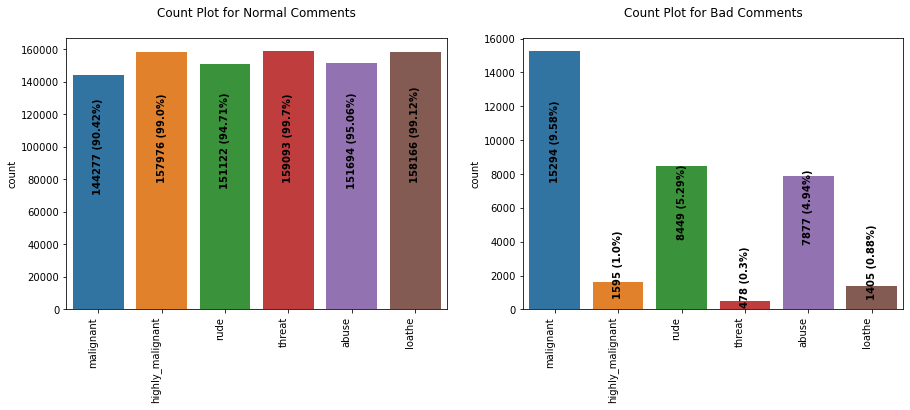

In [24]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

Obsrvation:
1)Dataset consists of higher number of Normal Comments than Bad or Malignant Comments.Therefore ,it is clear that dataset is imbalanced and needs to be handled accordingly.
2)Most of the bad comments are of type malignant while least number oftype threat is present in the dataset.
3)Majority of bad comments are of type malignant,rude and abuse

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


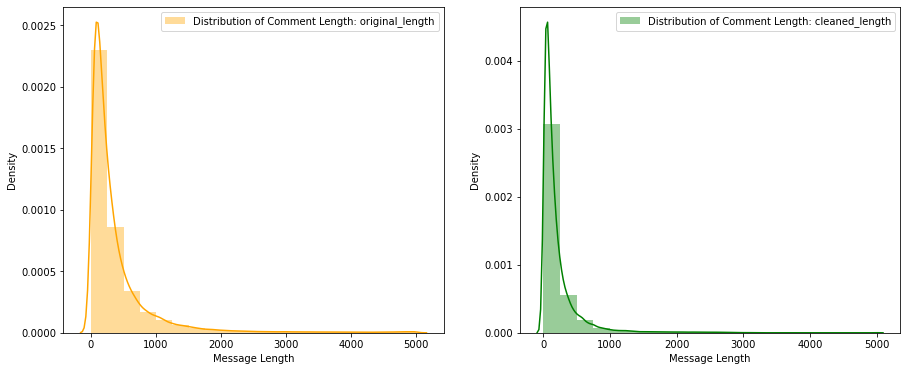

In [25]:
# Comparing the comment text length distribution before cleaning and after cleaning

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

Observation:

Before cleaning comment_text column most of the comment's length lies between 0 to 1100 while after cleaning it has been reduced between 0 to 900.

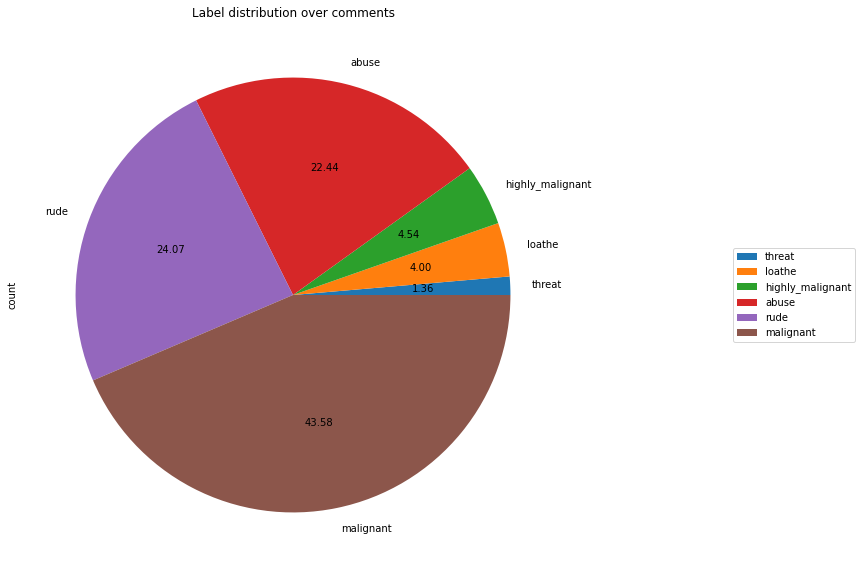

In [26]:
# Visualizing the label distribution of comments using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

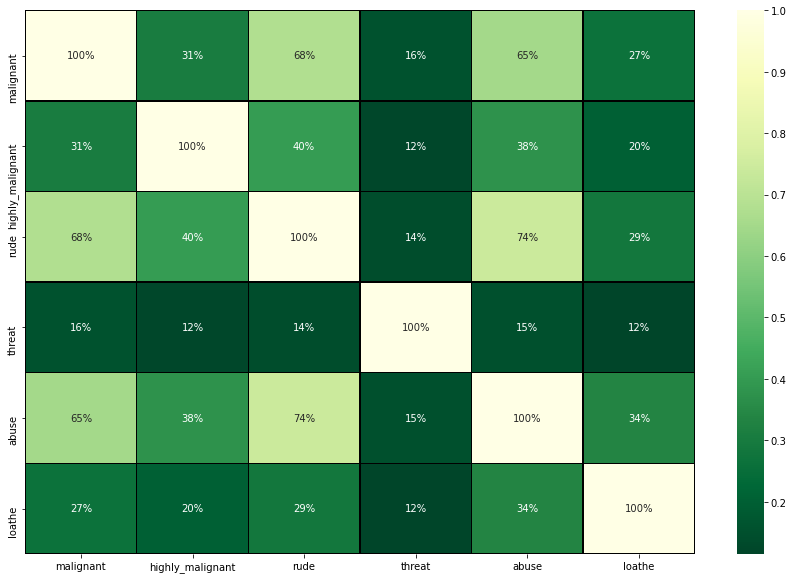

In [27]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df_train.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

# Data Preparation for Model Training and Testing

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix


In [29]:
# 1. Convert text to Vectors

# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

# Checking the shape of features
features.shape

(159571, 4000)

In [30]:
#separating Input and Output variables

#Input variables
X=features

#Output variables
Y=csr_matrix(df[output_labels]).toarray()

#checking shapes of input and output variables to take care of testing purpose
print('Input Variable Shape:',X.shape)
print('Output Variable Shape:',Y.shape)

Input Variable Shape: (159571, 4000)
Output Variable Shape: (159571, 6)


# Classification Machine Learning Model building

In [31]:
# Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

In [33]:
import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix


In [34]:
!pip install scikit-multilearn

In [37]:
from skmultilearn.problem_transform import BinaryRelevance

In [38]:
# Preparing the list of models for classification purpose
models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "K Nearest Neighbors Classifier": {"name": KNeighborsClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
          "Bagging Classifier": {"name": BaggingClassifier(base_estimator=LinearSVC())},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/9 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [32.36409582100009 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.024091657171793898
	Accuracy Score: 0.9074060007595898
              precision    recall  f1-score   support

           0       0.94      0.48      0.63      1281
           1       1.00      0.01      0.01       150
           2       0.93      0.45      0.60       724
           3       0.00      0.00      0.00        44
           4       0.84      0.35      0.49       650
           5       0.00      0.00      0.00       109

   micro avg       0.91      0.39      0.55      2958
   macro avg       0.62      0.21      0.29      2958
weighted avg       0.87      0.39      0.53      2958
 samples avg       0.04      0.03      0.04      2958
Completed in [7.03161689500007 sec.]

Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.021939486010887455
	Accuracy Score: 0.9128750474743639
              precision    recall  f1-score   support

           0       0.94      0.53      0.67      1281
           1       0.60      0.18      0.28       150
           2       0.96      0.54      0.69       724
           3       0.00      0.00      0.00        44
           4       0.80      0.42      0.56       650
           5       0.91      0.09      0.17       109

   micro avg       0.90      0.46      0.61      2958
   macro avg       0.70      0.29      0.39      2958
weighted avg       0.88      0.46      0.60      2958
 samples avg       0.05      0.04      0.04      2958
Completed in [43.70510701699982 sec.]

Current Model in Progress: Random Forest Classifier 
Training:  BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.020319027725028485
	Accuracy Score: 0.9117356627421193
              precision    recall  f1-score   support

           0       0.86      0.64      0.73      1281
           1       0.40      0.04      0.07       150
           2       0.88      0.72      0.79       724
           3       0.00      0.00      0.00        44
           4       0.72      0.54      0.62       650
           5       0.86      0.11      0.20       109

   micro avg       0.83      0.58      0.68      2958
   macro avg       0.62      0.34      0.40      2958
weighted avg       0.80      0.58      0.66      2958
 samples avg       0.06      0.05      0.05      2958
Completed in [1897.043386242 sec.]

Current Model in Progress: Support Vector Classifier 
Training:  BinaryRelevance(classifier=LinearSVC(max_iter=3000), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.019977212305355107
	Accuracy Score: 0.9135586783137106
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1281
           1       0.52      0.27      0.35       150
           2       0.90      0.67      0.77       724
           3       0.58      0.16      0.25        44
           4       0.74      0.56      0.64       650
           5       0.78      0.29      0.43       109

   micro avg       0.82      0.60      0.69      2958
   macro avg       0.73      0.43      0.53      2958
weighted avg       0.81      0.60      0.69      2958
 samples avg       0.06      0.05      0.05      2958
Completed in [10.743149954999808 sec.]

Current Model in Progress: Ada Boost Classifier 
Training:  BinaryRelevance(classifier=AdaBoostClassifier(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.023281428028864414
	Accuracy Score: 0.9044436004557539
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1281
           1       0.48      0.24      0.32       150
           2       0.88      0.62      0.73       724
           3       0.50      0.18      0.27        44
           4       0.74      0.38      0.50       650
           5       0.63      0.29      0.40       109

   micro avg       0.81      0.50      0.62      2958
   macro avg       0.68      0.38      0.48      2958
weighted avg       0.79      0.50      0.61      2958
 samples avg       0.05      0.04      0.05      2958
Completed in [1204.6709913229997 sec.]

Current Model in Progress: K Nearest Neighbors Classifier 
Training:  BinaryRelevance(classifier=KNeighborsClassifier(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.03237118622610457
	Accuracy Score: 0.8942650968477023
              precision    recall  f1-score   support

           0       0.70      0.23      0.35      1281
           1       0.37      0.13      0.19       150
           2       0.81      0.27      0.40       724
           3       0.00      0.00      0.00        44
           4       0.69      0.24      0.36       650
           5       0.64      0.15      0.24       109

   micro avg       0.71      0.23      0.35      2958
   macro avg       0.53      0.17      0.26      2958
weighted avg       0.70      0.23      0.35      2958
 samples avg       0.02      0.02      0.02      2958
Completed in [724.5560702229996 sec.]

Current Model in Progress: Decision Tree Classifier 
Training:  BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.02652234460058235
	Accuracy Score: 0.883782757311052
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1281
           1       0.28      0.22      0.24       150
           2       0.77      0.75      0.76       724
           3       0.26      0.16      0.20        44
           4       0.57      0.61      0.59       650
           5       0.44      0.34      0.38       109

   micro avg       0.65      0.64      0.64      2958
   macro avg       0.50      0.46      0.48      2958
weighted avg       0.64      0.64      0.64      2958
 samples avg       0.06      0.06      0.06      2958
Completed in [2292.5403460939997 sec.]

Current Model in Progress: Bagging Classifier 
Training:  BinaryRelevance(classifier=BaggingClassifier(base_estimator=LinearSVC()),
                require_dense=[True, True])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing: 

	Hamming Loss  : 0.02042030636789467
	Accuracy Score: 0.912419293581466
              precision    recall  f1-score   support

           0       0.85      0.63      0.73      1281
           1       0.50      0.18      0.26       150
           2       0.90      0.65      0.76       724
           3       0.60      0.14      0.22        44
           4       0.76      0.53      0.62       650
           5       0.79      0.24      0.37       109

   micro avg       0.83      0.57      0.68      2958
   macro avg       0.73      0.39      0.49      2958
weighted avg       0.82      0.57      0.67      2958
 samples avg       0.06      0.05      0.05      2958
Completed in [467.1819945269999 sec.]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation:
From the above model comparision it is clear that Linear Support Vector Classifier performs better with Accuracy Score: 91.35586783137106% and Hamming Loss: 1.9977212305355107% than the other classification models. Therefore I am now going to use Linear Support Vector Classifier for further Hyperparameter tuning process.



# Hyperparameter Tuning

In [39]:
# Choosing Linear Support Vector Classifier model

fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/multiclass.py", line 281, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(delayed(_fit_binary)(
  File "/Users/apple/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/apple/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/apple/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", l

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

Observation:
After comparing all the classification models I have selected Linear Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. I am using the Grid Search CV method for hyper parameter tuning my best model. I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes. So the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model that I can use on my final model.



In [40]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy score for the Best Model is: 91.51069518716578
Hamming loss for the Best Model is: 1.9593917112299464


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.



# Confusion Matrix for Final Model

In [44]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10710    83]
  [  442   733]]

 [[11832     1]
  [  132     3]]

 [[11263    47]
  [  197   461]]

 [[11930     0]
  [   38     0]]

 [[11266   106]
  [  280   316]]

 [[11869     3]
  [   78    18]]]


In [46]:
import matplotlib.ticker as plticker

<ipython-input-47-b60bdd98cd1c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);


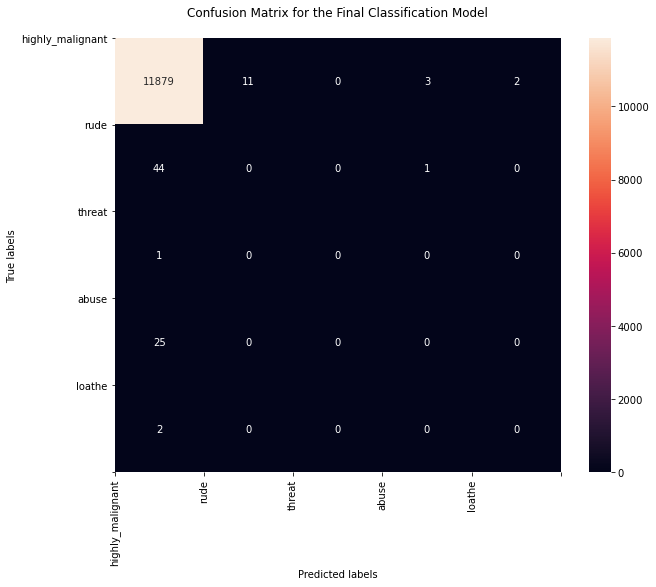

In [47]:
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my final model missed to provide the correct prediction (depicting in the black boxes).

# Model Saving or Serialization

In [49]:
import joblib

In [50]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

I am using joblib option to save the final classification model but it can be done using pickle also. 

# Preprocessing Pipeline for test dataframe


The following preprocessing pipeline is required to perform model prediction:

1)Use the test dataset
2)Remove null values if any
3)Drop column id
4)Convert comment text to lower case and replace '\n' with single space
5)Keep only text data ie. a-z' and remove other data from comment text
6)Remove stop words and punctuations
7)Apply Stemming using SnowballStemmer
8)Convert text to vectors using TfidfVectorizer
9)Load saved or serialized best model
10)Predict values and create a new CSV file

In [51]:
# Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)
    
# Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

# Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

# Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

# Apply Stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

print(df_test.info(memory_usage="deep"))

# Convert text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

# Make predictions and view the results
predict_test = model_loaded.predict(test_features)

# Saving predicted values into a CSV file
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')


<ipython-input-51-e8d8e8dde72c>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 37.2 MB
None


In [52]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,yo bitch ja rule succes ever what hate sad mof...,0,0,0,0,0,0
1,rfc titl fine imo,0,0,0,0,0,0
2,sourc zaw ashton lapland,0,0,0,0,0,0
3,look back sourc inform updat correct form gues...,0,0,0,0,0,0
4,anonym edit articl,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,total agre stuff noth long crap,0,0,0,0,0,0
153160,throw field home plate get faster throw cut ma...,0,0,0,0,0,0
153161,okinotorishima categori see chang agre correct...,0,0,0,0,0,0
153162,one found nation eu germani law return quit si...,0,0,0,0,0,0


In [53]:
df.to_csv('test_dataset_predictions.csv', index=False)